In [3]:
import os
import h5py as h5
import sys
import falsecolor.coloring as fc
from falsecolor.process import ViewImage
import numba
from numba import jit
from numba import cuda
import numpy as np
import cv2


In [2]:
!pip install falsecolor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76 kB 5.6 MB/s 
     |████████████████████████████████| 120 kB 70.7 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 
     |████████████████████████████████| 115 kB 70.4 MB/s 
     |████████████████████████████████| 1.6 MB 39.1 MB/s 
     |████████████████████████████████| 82 kB 896 kB/s 


In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [26]:
with h5.File('/content/gdrive/My Drive/EDsost.h5', 'r') as f:
    nuclei = f['channel1'][:]
    cyto = f['channel0'][:]

f.close()
print(nuclei.shape)

(6, 2529, 3355)


(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6699d86c90>)

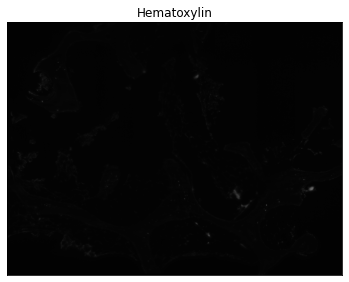

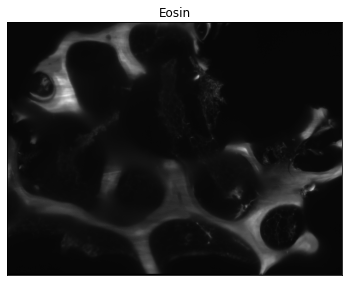

In [7]:
ViewImage(nuclei[1], figsize = (6,6), cmap = 'gray', title = 'Hematoxylin')
ViewImage(cyto[1], figsize = (6,6), cmap = 'gray', title = 'Eosin')

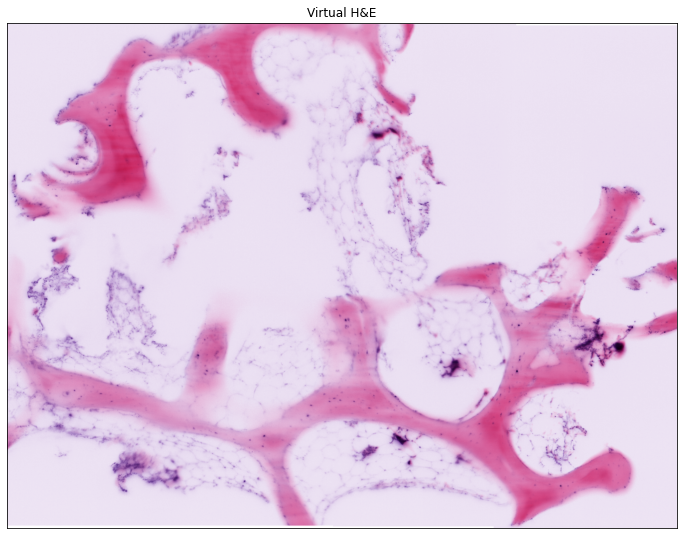

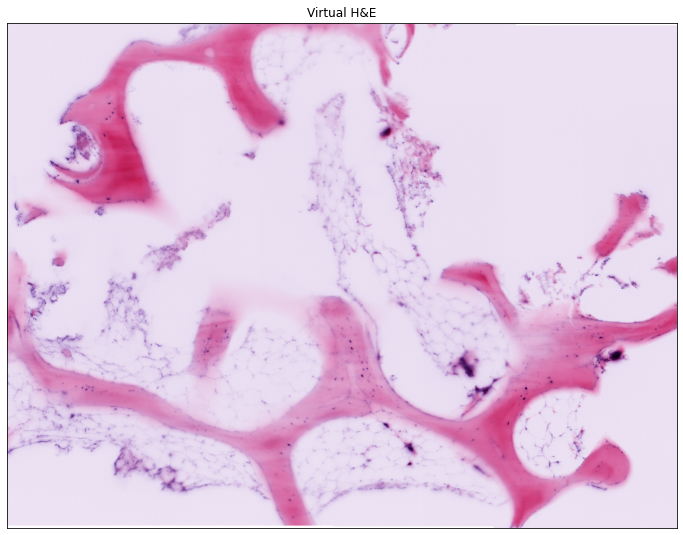

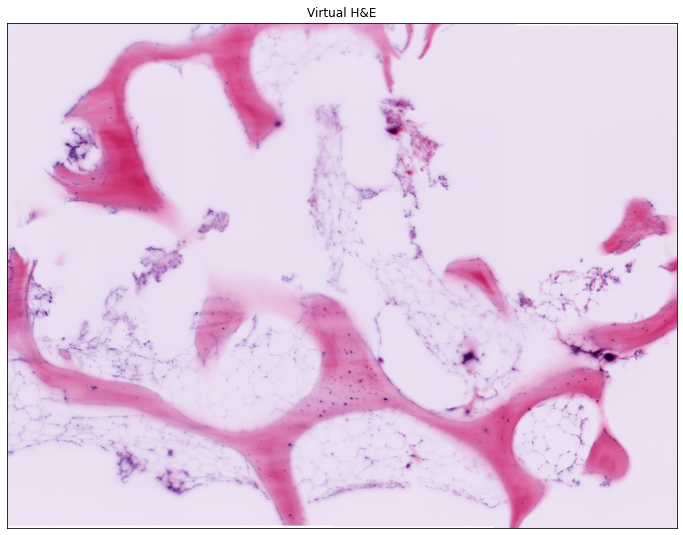

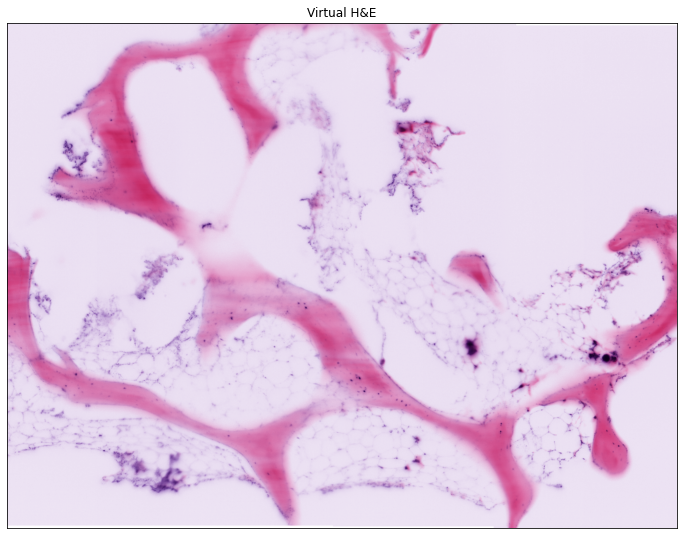

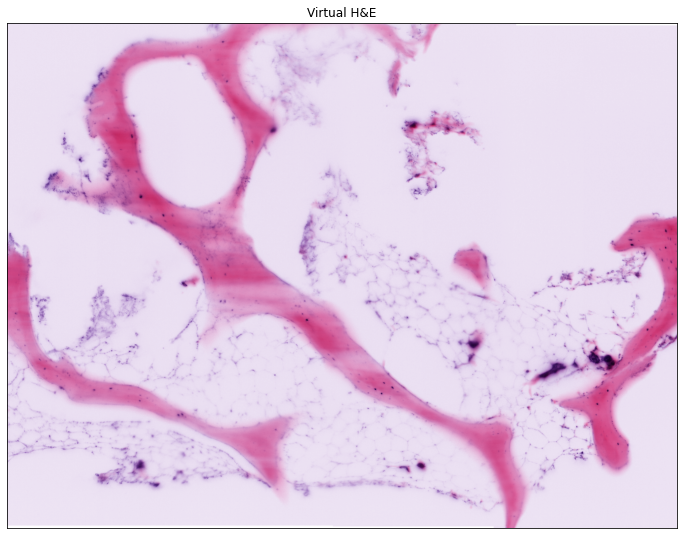

In [8]:
for i in range(0,5):
  nuc_background = fc.getBackgroundLevels(nuclei[i])[1]
  cyto_background = fc.getBackgroundLevels(cyto[i])[1]
  pseudo_image = fc.falseColor(nuclei[i], cyto[i], nuc_normfactor = 1800, nuc_threshold=nuc_background, cyto_threshold=cyto_background)
  ViewImage(pseudo_image, figsize = (12,12), title = 'Virtual H&E')
  file_folder = os.path.join('/mnt/c/Users/Emil/falsecolor/EDsost.h5')
  file_name = os.path.join('/mnt/c/Users/Emil/falsecolor/EDsost.h5' + str(i).zfill(4) + '.tiff')

In [43]:
with h5.File('/content/gdrive/My Drive/test.h5', 'r') as f:
    nuclei = f['channel1'][:]
    cyto = f['channel0'][:]
f.close()
print(nuclei.shape)

(474, 765)


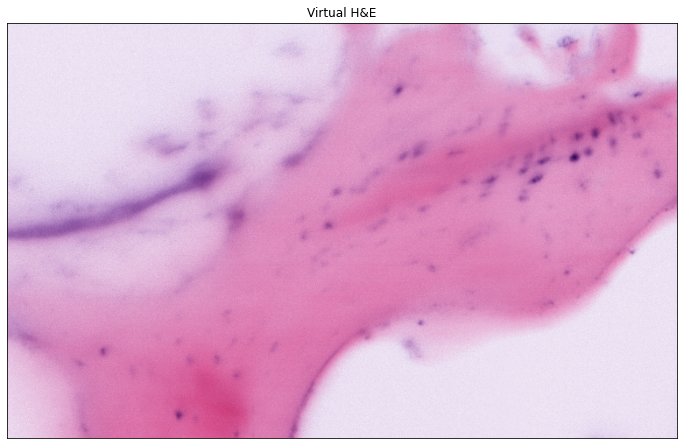

In [17]:
nuc_background = fc.getBackgroundLevels(nuclei)[1]
cyto_background = fc.getBackgroundLevels(cyto)[1]
pseudo_image = fc.falseColor(nuclei, cyto, nuc_normfactor = 1800, nuc_threshold=nuc_background, cyto_threshold=cyto_background)
ViewImage(pseudo_image, figsize = (12,12), title = 'Virtual H&E')
file_folder = os.path.join('/mnt/c/Users/Emil/falsecolor/test.h5')
file_name = os.path.join('/mnt/c/Users/Emil/falsecolor/test.h5' + str(i).zfill(4) + '.tiff')

In [44]:
nuc_background = fc.getBackgroundLevels(nuclei[0])
cyto_background = fc.getBackgroundLevels(cyto[0])

In [46]:
sharp_nuclei = fc.sharpenImage(nuclei)
sharp_cyto = fc.sharpenImage(cyto)

#ViewImage(sharp_nuclei, cmap = 'gray', figsize = (6,6), title = 'Sharpened Hematoxylin')
#ViewImage(sharp_cyto, cmap = 'gray', figsize = (6,6), title = 'Sharpened Eosin')

/usr/local/lib/python3.7/dist-packages/numba/cuda/cudadrv/devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


In [41]:
pseudo_prostate = fc.rapidFalseColor(sharp_nuclei, sharp_cyto, nuclei_RGBsettings, cyto_RGBsettings, nuc_normfactor = 1800)

In [38]:
settings_dict = fc.getColorSettings(key = 'HE')
nuclei_RGBsettings = settings_dict['nuclei']
cyto_RGBsettings = settings_dict['cyto']

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6665e1f610>)

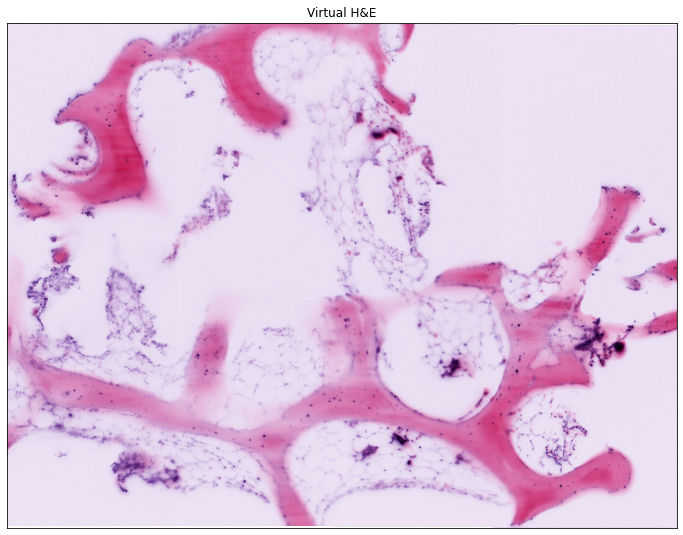

In [42]:
ViewImage(pseudo_prostate, figsize = (12,12), title = 'Virtual H&E')

In [47]:
pseudo_prostate = fc.rapidFalseColor(sharp_nuclei, sharp_cyto, nuclei_RGBsettings, cyto_RGBsettings, nuc_normfactor = 1800)

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6665dd2ed0>)

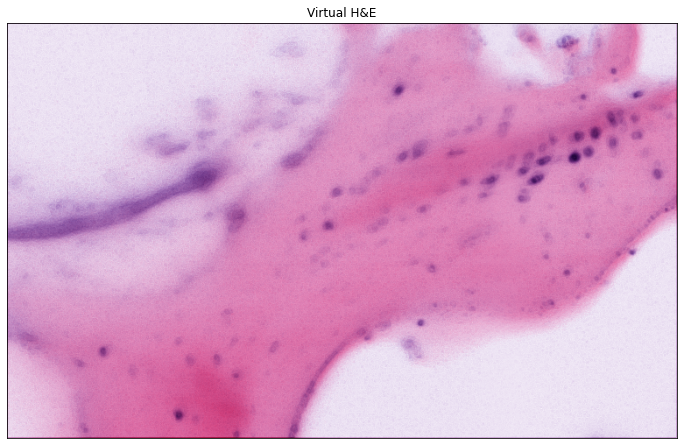

In [48]:
ViewImage(pseudo_prostate, figsize = (12,12), title = 'Virtual H&E')